In [283]:
# Importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 14 columns):
Display_first_last    399 non-null object
birthdate             399 non-null object
value                 399 non-null float64
slugSeason            399 non-null object
position              399 non-null object
pts                   399 non-null float64
ast                   399 non-null float64
reb                   399 non-null float64
pie                   377 non-null float64
season_exp            399 non-null int64
draft_year            399 non-null object
draft_round           399 non-null object
draft_number          399 non-null object
BMI                   399 non-null float64
dtypes: float64(6), int64(1), object(7)
memory usage: 43.8+ KB
None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1547F3D08>,
      dtype=object)

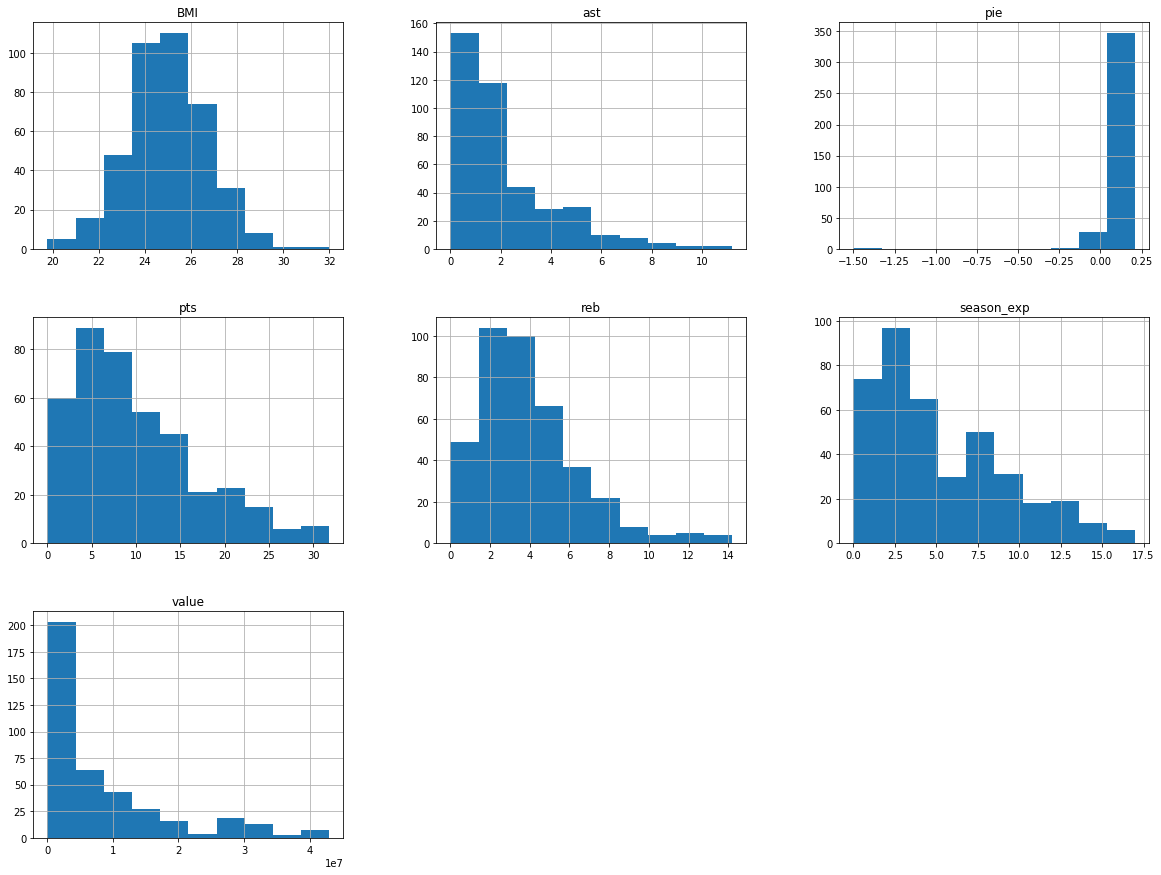

In [284]:
def load_data(file_name):
    # A simple read file function using pandas
    csv_path = file_name
    return pd.read_csv(csv_path)

raw_data = load_data('salaries.csv')

print(raw_data.info())
raw_data.hist(figsize=(20,15))

In [285]:
raw_data.head(10)

,Display_first_last,birthdate,value,slugSeason,position,pts,ast,reb,pie,season_exp,draft_year,draft_round,draft_number,BMI
0,Bogdan Bogdanovic,1992-08-18T00:00:00,18000000.0,2020-21,Guard,9.6,2.3,3.3,0.080,3,2014,1,27,25.420776
1,Brandon Goodwin,1995-10-02T00:00:00,1701593.0,2020-21,Guard,3.9,1.6,1.0,0.062,2,Undrafted,Undrafted,Undrafted,24.409722
2,Bruno Fernando,1998-08-15T00:00:00,1517981.0,2020-21,Forward-Center,1.5,0.4,3.0,0.073,1,2019,2,34,25.715592
3,Cam Reddish,1999-09-01T00:00:00,4458000.0,2020-21,Forward-Guard,11.2,1.3,4.0,0.053,1,2019,1,10,23.945938
4,Clint Capela,1994-05-18T00:00:00,16000000.0,2020-21,Center,14.3,0.9,14.2,0.161,6,2014,1,25,25.092207
5,Danilo Gallinari,1988-08-08T00:00:00,19500000.0,2020-21,Forward,12.8,1.5,3.9,0.110,11,2008,1,6,24.360351
6,De'Andre Hunter,1997-12-02T00:00:00,7422000.0,2020-21,Forward-Guard,16.7,2.2,5.2,0.114,1,2019,1,4,24.714844
7,John Collins,1997-09-23T00:00:00,4137302.0,2020-21,Forward-Center,18.3,1.3,7.8,0.124,3,2017,1,19,25.179851
8,Kevin Huerter,1998-08-27T00:00:00,2761920.0,2020-21,Guard-Forward,11.9,3.6,3.7,0.077,2,2018,1,19,21.402019
9,Khyri Thomas,1996-05-08T00:00:00,744684.0,2020-21,Guard,2.3,0.3,0.6,NaN,2,2018,2,38,26.245333


### FIRST LETS CLEAN DATA
- Convert Date to Age at the end of 2021
- Hot Encode positions
- Sort out draft
- Sort out null PIE Values


In [286]:
# Converting date to age
from datetime import datetime

def getAge(birthdate):
    today = datetime(2021, 12, 31)
    age = today.year-birthdate.year-((today.month,today.day)<(birthdate.month,birthdate.day))
    return age

raw_data['birthdate'] = pd.to_datetime(raw_data['birthdate'], format="%Y-%m-%d")

raw_data['birthdate'] = raw_data['birthdate'].apply(getAge)

raw_data.rename(columns={'birthdate':'age'},inplace=True)

raw_data.head(5)


,Display_first_last,age,value,slugSeason,position,pts,ast,reb,pie,season_exp,draft_year,draft_round,draft_number,BMI
0,Bogdan Bogdanovic,29,18000000.0,2020-21,Guard,9.6,2.3,3.3,0.080,3,2014,1,27,25.420776
1,Brandon Goodwin,26,1701593.0,2020-21,Guard,3.9,1.6,1.0,0.062,2,Undrafted,Undrafted,Undrafted,24.409722
2,Bruno Fernando,23,1517981.0,2020-21,Forward-Center,1.5,0.4,3.0,0.073,1,2019,2,34,25.715592
3,Cam Reddish,22,4458000.0,2020-21,Forward-Guard,11.2,1.3,4.0,0.053,1,2019,1,10,23.945938
4,Clint Capela,27,16000000.0,2020-21,Center,14.3,0.9,14.2,0.161,6,2014,1,25,25.092207


In [287]:
# Convert draft_round and draft number to draft_round.draft number (i.e 1st round 3rd pick becomes 1.3)

raw_data['draft_round'] = raw_data['draft_round'].replace('Undrafted',3)
raw_data['draft_number'] = raw_data['draft_number'].replace('Undrafted',0)
raw_data['draft_round'] = raw_data['draft_round'].replace('None',3)
raw_data['draft_number'] = raw_data['draft_number'].replace('None',0)

raw_data.head(5)

def convertDraft(draft_round, draft_number):
    draft_value = str(draft_round) + '.' + str(draft_number)
    draft_value = float(draft_value)
    return draft_value 

raw_data.insert(11, 'draftValue', raw_data.apply(lambda x: convertDraft(x.draft_round, x.draft_number), axis = 1), True)

raw_data.apply(lambda x: convertDraft(x.draft_round, x.draft_number), axis = 1)

raw_data = raw_data.drop('draft_round', axis = 1); raw_data = raw_data.drop('draft_number', axis = 1)

raw_data.head(10)

,Display_first_last,age,value,slugSeason,position,pts,ast,reb,pie,season_exp,draft_year,draftValue,BMI
0,Bogdan Bogdanovic,29,18000000.0,2020-21,Guard,9.6,2.3,3.3,0.080,3,2014,1.27,25.420776
1,Brandon Goodwin,26,1701593.0,2020-21,Guard,3.9,1.6,1.0,0.062,2,Undrafted,3.00,24.409722
2,Bruno Fernando,23,1517981.0,2020-21,Forward-Center,1.5,0.4,3.0,0.073,1,2019,2.34,25.715592
3,Cam Reddish,22,4458000.0,2020-21,Forward-Guard,11.2,1.3,4.0,0.053,1,2019,1.10,23.945938
4,Clint Capela,27,16000000.0,2020-21,Center,14.3,0.9,14.2,0.161,6,2014,1.25,25.092207
5,Danilo Gallinari,33,19500000.0,2020-21,Forward,12.8,1.5,3.9,0.110,11,2008,1.60,24.360351
6,De'Andre Hunter,24,7422000.0,2020-21,Forward-Guard,16.7,2.2,5.2,0.114,1,2019,1.40,24.714844
7,John Collins,24,4137302.0,2020-21,Forward-Center,18.3,1.3,7.8,0.124,3,2017,1.19,25.179851
8,Kevin Huerter,23,2761920.0,2020-21,Guard-Forward,11.9,3.6,3.7,0.077,2,2018,1.19,21.402019
9,Khyri Thomas,25,744684.0,2020-21,Guard,2.3,0.3,0.6,NaN,2,2018,2.38,26.245333


In [288]:
# Hot Encoding Positions 
raw_data['position'].value_counts()

Guard             139
Forward           103
Guard-Forward      43
Center             36
Forward-Center     34
Center-Forward     23
Forward-Guard      21
Name: position, dtype: int64

In [289]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
pos_cat_1hot = pd.DataFrame(cat_encoder.fit_transform(raw_data[['position']]).toarray())
pos_cat_1hot = pos_cat_1hot.rename(columns = {0 : 'Center', 1 : 'Center-Forward', 2 :'Forward', 3 : 'Forward-Center', 4 : 'Forward-Guard', 5 : 'Guard', 6 : 'Guard-Forward'})
raw_data = raw_data.drop(['position', 'slugSeason', 'draft_year'], axis = 1)
raw_data = raw_data.join(pos_cat_1hot)
raw_data.head(10)

,Display_first_last,age,value,pts,ast,reb,pie,season_exp,draftValue,BMI,Center,Center-Forward,Forward,Forward-Center,Forward-Guard,Guard,Guard-Forward
0,Bogdan Bogdanovic,29,18000000.0,9.6,2.3,3.3,0.080,3,1.27,25.420776,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Brandon Goodwin,26,1701593.0,3.9,1.6,1.0,0.062,2,3.00,24.409722,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Bruno Fernando,23,1517981.0,1.5,0.4,3.0,0.073,1,2.34,25.715592,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Cam Reddish,22,4458000.0,11.2,1.3,4.0,0.053,1,1.10,23.945938,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Clint Capela,27,16000000.0,14.3,0.9,14.2,0.161,6,1.25,25.092207,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Danilo Gallinari,33,19500000.0,12.8,1.5,3.9,0.110,11,1.60,24.360351,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,De'Andre Hunter,24,7422000.0,16.7,2.2,5.2,0.114,1,1.40,24.714844,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,John Collins,24,4137302.0,18.3,1.3,7.8,0.124,3,1.19,25.179851,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,Kevin Huerter,23,2761920.0,11.9,3.6,3.7,0.077,2,1.19,21.402019,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,Khyri Thomas,25,744684.0,2.3,0.3,0.6,NaN,2,2.38,26.245333,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Dealing with PIE

In [290]:
raw_data['pie'].unique()

array([ 0.08 ,  0.062,  0.073,  0.053,  0.161,  0.11 ,  0.114,  0.124,
        0.077,    nan,  0.082,  0.103,  0.038,  0.072,  0.151,  0.076,
        0.107,  0.043,  0.132,  0.145,  0.09 ,  0.094,  0.024,  0.063,
        0.106,  0.098,  0.023,  0.085,  0.108, -0.011,  0.17 ,  0.163,
        0.15 ,  0.096,  0.059,  0.143, -0.094, -0.012,  0.102,  0.037,
        0.065,  0.067,  0.07 ,  0.091,  0.101,  0.125,  0.049,  0.093,
        0.088,  0.086,  0.112,  0.087,  0.166,  0.095,  0.056,  0.069,
        0.172,  0.071,  0.131,  0.146,  0.153,  0.083,  0.147,  0.074,
       -1.5  ,  0.134,  0.075,  0.187,  0.058,  0.044,  0.115,  0.126,
        0.089,  0.205,  0.081,  0.1  ,  0.117,  0.092,  0.036, -0.197,
        0.097,  0.136,  0.176,  0.05 ,  0.113,  0.169,  0.127,  0.118,
        0.045,  0.144,  0.06 ,  0.12 ,  0.104,  0.066,  0.057,  0.194,
        0.078,  0.035,  0.152,  0.031,  0.167,  0.19 ,  0.025,  0.099,
        0.105,  0.116,  0.068,  0.196,  0.021,  0.039,  0.079,  0.109,
      

In [291]:
raw_data['pie'].isnull().value_counts()

False    377
True      22
Name: pie, dtype: int64

In [292]:
raw_data['pie'] = raw_data['pie'].replace(np.nan, 0) # Replacing Null values with zero (assumes the player has no impact on game )
raw_data['pie'].isnull().value_counts()

False    399
Name: pie, dtype: int64

In [293]:
upper_bound = raw_data['pie'].mean() + 3*raw_data['pie'].std()
lower_bound = raw_data['pie'].mean() - 3*raw_data['pie'].std()

print("Highest allowed", upper_bound)
print("Lowest allowed", lower_bound)

Highest allowed 0.35991340356401524
Lowest allowed -0.1981189173484764


In [294]:
#OUTLIER PIE DETECTION
raw_outliers = raw_data[(raw_data['pie'] > upper_bound) | (raw_data['pie'] < lower_bound)]
print(raw_outliers)

    Display_first_last  age     value  pts  ast  reb   pie  season_exp  \
81       Rayjon Tucker   24  340000.0  4.0  1.0  0.0 -1.50           1   
385   Anzejs Pasecniks   26  374297.0  0.0  1.0  1.0 -0.26           1   

     draftValue        BMI  Center  Center-Forward  Forward  Forward-Center  \
81         3.00  26.120356     0.0             0.0      0.0             0.0   
385        1.25  22.281938     0.0             1.0      0.0             0.0   

     Forward-Guard  Guard  Guard-Forward  
81             0.0    1.0            0.0  
385            0.0    0.0            0.0  


In [295]:
raw_outliers.Display_first_last.isin(raw_data.Display_first_last)


81     True
385    True
Name: Display_first_last, dtype: bool

In [296]:
index_outliers = raw_outliers.index.tolist()
raw_data = raw_data.drop(labels = index_outliers, axis = 0)

we see a nan value here

In [297]:
raw_data['Display_first_last'].value_counts()

print(raw_data['Display_first_last'].value_counts().to_string())
# looks like some names are repeated, fix this by dropping these players of the dataset 



Norvel Pelle              3
Blake Griffin             2
Wayne Ellington           2
Oshae Brissett            2
Nicolas Batum             2
Gorgui Dieng              2
LaMarcus Aldridge         2
Jeff Teague               2
Ben McLemore              2
Patrick Patterson         2
Quinn Cook                2
DeMarcus Cousins          2
Andre Drummond            2
Alex Len                  2
Damian Jones              2
Jordan Bell               2
Boban Marjanovic          1
Markieff Morris           1
Donovan Mitchell          1
Javonte Green             1
Bruno Fernando            1
Richaun Holmes            1
Jevon Carter              1
PJ Dozier                 1
Paul George               1
Jaylen Nowell             1
Marquese Chriss           1
Caleb Martin              1
Mason Plumlee             1
Mitchell Robinson         1
Eric Paschall             1
Isaiah Thomas             1
Joel Embiid               1
Ryan Arcidiacono          1
Royce O'Neale             1
Chris Clemons       

In [298]:
raw_dupli = raw_data['Display_first_last'].duplicated()


In [299]:
raw_data['Display_first_last'].duplicated().value_counts()
# Lets drop duplicated values 

False    380
True      17
Name: Display_first_last, dtype: int64

In [300]:
raw_data = raw_data.drop_duplicates(subset=['Display_first_last'], keep = False)

In [301]:
print(raw_data['Display_first_last'].value_counts().to_string())

Dwayne Bacon              1
Donovan Mitchell          1
Bruno Fernando            1
Richaun Holmes            1
Jevon Carter              1
Paul George               1
Jaylen Nowell             1
Markieff Morris           1
Mason Plumlee             1
Mitchell Robinson         1
Eric Paschall             1
Isaiah Thomas             1
Royce O'Neale             1
Chris Clemons             1
Delon Wright              1
Monte Morris              1
Hassan Whiteside          1
Bobby Portis              1
Grant Williams            1
Nemanja Bjelica           1
Avery Bradley             1
Javonte Green             1
Kyle Lowry                1
Rodney McGruder           1
Caleb Martin              1
JaVale McGee              1
Jacob Evans               1
Jared Dudley              1
Khris Middleton           1
Jrue Holiday              1
Jahlil Okafor             1
Seth Curry                1
Chimezie Metu             1
De'Andre Hunter           1
Danilo Gallinari          1
Edmond Sumner       

In [302]:
raw_data

,Display_first_last,age,value,pts,ast,reb,pie,season_exp,draftValue,BMI,Center,Center-Forward,Forward,Forward-Center,Forward-Guard,Guard,Guard-Forward
0,Bogdan Bogdanovic,29,18000000.0,9.6,2.3,3.3,0.080,3,1.27,25.420776,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Brandon Goodwin,26,1701593.0,3.9,1.6,1.0,0.062,2,3.00,24.409722,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Bruno Fernando,23,1517981.0,1.5,0.4,3.0,0.073,1,2.34,25.715592,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Cam Reddish,22,4458000.0,11.2,1.3,4.0,0.053,1,1.10,23.945938,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Clint Capela,27,16000000.0,14.3,0.9,14.2,0.161,6,1.25,25.092207,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,Raul Neto,29,1620564.0,7.7,2.2,2.2,0.081,5,2.47,23.745543,0.0,0.0,0.0,0.0,0.0,1.0,0.0
395,Robin Lopez,33,7300000.0,8.2,0.9,4.1,0.084,12,1.15,27.996457,1.0,0.0,0.0,0.0,0.0,0.0,0.0
396,Rui Hachimura,23,4692840.0,13.4,1.5,5.8,0.085,1,1.90,25.264063,0.0,0.0,1.0,0.0,0.0,0.0,0.0
397,Russell Westbrook,33,41358814.0,21.7,10.3,9.5,0.146,12,1.40,24.995556,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Adding more data

In [303]:
raw_supp_data = load_data('extra_data.csv')
supp_data_names = raw_supp_data['Player'].duplicated(keep='first')
raw_supp_data.head(10)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,achiupr01
1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,adamsja01
2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,adamsst01
3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,adebaba01
4,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,...,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,aldrila01
5,5,LaMarcus Aldridge,C,35,SAS,21,18,25.9,5.5,11.8,...,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7,aldrila01
6,5,LaMarcus Aldridge,C,35,BRK,5,5,26.0,5.0,9.6,...,0.4,4.4,4.8,2.6,0.6,2.2,1.4,2.2,12.8,aldrila01
7,6,Ty-Shon Alexander,SG,22,PHO,15,0,3.1,0.2,0.8,...,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6,alexaty01
8,7,Nickeil Alexander-Walker,SG,22,NOP,46,13,21.9,4.2,10.0,...,0.3,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0,alexani01
9,8,Grayson Allen,SG,25,MEM,50,38,25.2,3.5,8.3,...,0.4,2.8,3.2,2.2,0.9,0.2,1.0,1.4,10.6,allengr01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 23 columns):
Player    705 non-null object
G         705 non-null int64
GS        705 non-null int64
MP        705 non-null float64
FG        705 non-null float64
FGA       705 non-null float64
FG%       703 non-null float64
3P        705 non-null float64
3PA       705 non-null float64
3P%       670 non-null float64
2P        705 non-null float64
2PA       705 non-null float64
2P%       699 non-null float64
eFG%      703 non-null float64
FT        705 non-null float64
FTA       705 non-null float64
FT%       676 non-null float64
ORB       705 non-null float64
DRB       705 non-null float64
STL       705 non-null float64
BLK       705 non-null float64
TOV       705 non-null float64
PF        705 non-null float64
dtypes: float64(20), int64(2), object(1)
memory usage: 126.8+ KB
None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E154C7E488>,
      dtype=object)

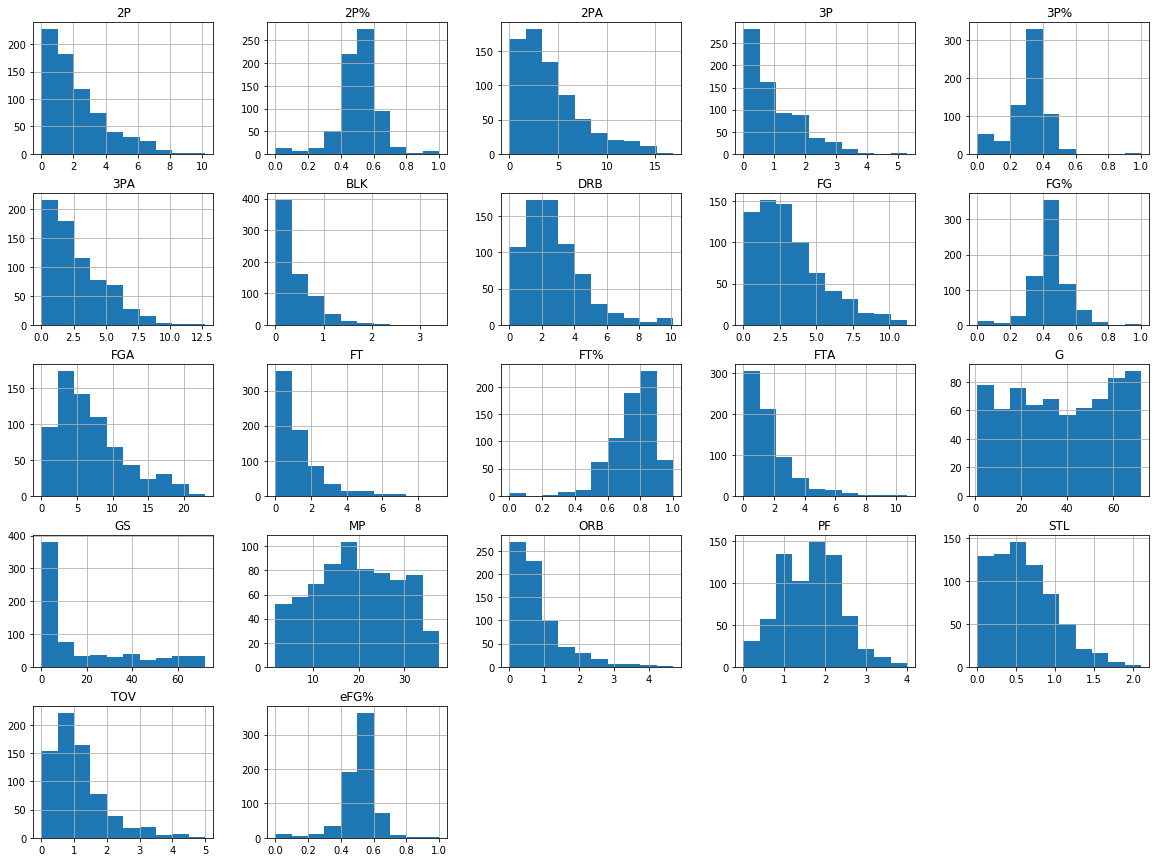

In [304]:
supp_data = raw_supp_data.drop(columns=['Player-additional','Tm','Age','Pos','TRB','Rk', 'PTS', 'TRB', 'AST']) # Dropping unnecessary data

print(supp_data.info())
supp_data.hist(figsize=(20,15))

In [305]:
# Cleaning null values

supp_data.isnull().sum()

Player     0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        2
3P         0
3PA        0
3P%       35
2P         0
2PA        0
2P%        6
eFG%       2
FT         0
FTA        0
FT%       29
ORB        0
DRB        0
STL        0
BLK        0
TOV        0
PF         0
dtype: int64

In [306]:
supp_data.loc[supp_data_names == True].head(10)

# need to merge these into a single row, this will be done using using games as and average

# def mergePlayer(DataList):
#     for i in DataList['Player']:
#         print(i.values)
#     return

# mergePlayer(supp_data.head(5))

# Looks like the null values are caused by divide by zero

supp_data.loc[supp_data['3P%'].isnull()]

,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,eFG%,FT,FTA,FT%,ORB,DRB,STL,BLK,TOV,PF
11,Jarrett Allen,12,5,26.7,3.7,5.4,0.677,0.0,0.0,NaN,...,0.677,3.8,5.1,0.754,3.2,7.3,0.6,1.6,1.8,1.8
18,Kostas Antetokounmpo,15,0,3.7,0.2,0.7,0.300,0.0,0.0,NaN,...,0.300,0.4,0.9,0.462,0.3,1.0,0.1,0.3,0.7,0.5
30,Udoka Azubuike,15,0,3.8,0.3,0.6,0.444,0.0,0.0,NaN,...,0.444,0.5,0.7,0.800,0.3,0.6,0.1,0.3,0.2,0.6
49,Jordan Bell,1,0,15.0,0.0,2.0,0.000,0.0,0.0,NaN,...,0.000,1.0,2.0,0.500,1.0,4.0,0.0,2.0,1.0,2.0
68,Marques Bolden,6,0,4.8,0.2,0.5,0.333,0.0,0.0,NaN,...,0.333,0.8,1.3,0.625,0.5,0.5,0.3,0.3,0.3,0.0
82,Ignas Brazdeikis,4,0,1.8,0.0,0.3,0.000,0.0,0.0,NaN,...,0.000,0.5,0.5,1.000,0.3,0.3,0.0,0.0,0.3,0.0
87,Amida Brimah,5,0,5.8,1.0,1.6,0.625,0.0,0.0,NaN,...,0.625,0.6,0.6,1.000,0.4,1.2,0.0,1.0,0.8,0.8
95,Moses Brown,43,32,21.4,3.4,6.2,0.545,0.0,0.0,NaN,...,0.545,1.8,2.9,0.619,3.6,5.3,0.7,1.1,1.0,2.2
108,Devontae Cacok,20,1,4.9,0.9,1.5,0.586,0.0,0.0,NaN,...,0.586,0.3,0.6,0.455,0.6,1.0,0.3,0.2,0.3,0.4
113,Clint Capela,63,63,30.1,6.6,11.0,0.594,0.0,0.0,NaN,...,0.594,2.1,3.6,0.573,4.7,9.6,0.7,2.0,1.2,2.3


In [307]:

supp_data['FG%'] = supp_data['FG%'].replace(np.nan,0)
supp_data['3P%'] = supp_data['3P%'].replace(np.nan,0)
supp_data['2P%'] = supp_data['2P%'].replace(np.nan,0)
supp_data['eFG%'] = supp_data['eFG%'].replace(np.nan,0)
supp_data['FT%'] = supp_data['FT%'].replace(np.nan,0)


supp_data.isnull().sum() 

# All null values have been processed

Player    0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
STL       0
BLK       0
TOV       0
PF        0
dtype: int64

In [308]:
supp_data_names.head(20)

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7     False
8     False
9     False
10    False
11     True
12     True
13    False
14     True
15     True
16    False
17    False
18    False
19    False
Name: Player, dtype: bool

In [309]:
supp_namedata_index = supp_data_names.index[supp_data_names == True]

supp_data = supp_data.drop(supp_namedata_index)

In [310]:
supp_data['Player'].duplicated().value_counts()

False    540
Name: Player, dtype: int64

In [311]:
# supp_data.drop(supp_data.iloc(supp_data_names.iloc()))

# supp_data_names.iloc(supp_data_names.col == True)

supp_data_names == True

0      False
1      False
2      False
3      False
4      False
       ...  
700     True
701    False
702    False
703    False
704    False
Name: Player, Length: 705, dtype: bool

In [312]:
supp_data['Player'].isin(supp_data_names)

0      False
1      False
2      False
3      False
4      False
       ...  
698    False
701    False
702    False
703    False
704    False
Name: Player, Length: 540, dtype: bool

In [313]:
full_data = raw_data.set_index('Display_first_last').join(supp_data.set_index('Player'))
full_data.loc[full_data['FT'].isnull()]

,age,value,pts,ast,reb,pie,season_exp,draftValue,BMI,Center,...,eFG%,FT,FTA,FT%,ORB,DRB,STL,BLK,TOV,PF
Display_first_last,,,,,,,,,,,,,,,,,,,,,
Nicolas Claxton,22,1517981.0,9.8,0.9,4.3,0.143,1,2.31,21.940049,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JJ Redick,37,13013700.0,8.7,1.3,1.7,0.071,14,1.11,24.995556,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dzanan Musa,22,2002800.0,4.3,0.9,1.9,0.000,2,1.29,23.251181,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zhaire Smith,22,1068200.0,3.7,0.9,1.2,0.000,2,1.16,25.620444,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Klay Thompson,31,35361360.0,21.5,2.4,3.8,0.103,8,1.11,24.843031,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chris Clemons,24,1517981.0,4.9,0.8,0.9,0.000,1,3.00,26.578450,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dion Waiters,30,12650000.0,13.1,2.8,2.6,0.000,8,1.40,26.245333,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mario Hezonja,26,1977011.0,6.9,1.3,3.1,0.000,5,1.50,24.165625,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marko Guduric,26,2750000.0,3.9,1.0,1.7,0.000,1,3.00,23.225345,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
# Removing accent from some names 

supp_data['Player'] = supp_data['Player'].str.normalize('NFKD').str.encode('ascii', errors = 'ignore').str.decode('utf-8')

full_data = raw_data.set_index('Display_first_last').join(supp_data.set_index('Player'))

In [315]:
full_data.loc[full_data['FT'].isnull()]

,age,value,pts,ast,reb,pie,season_exp,draftValue,BMI,Center,...,eFG%,FT,FTA,FT%,ORB,DRB,STL,BLK,TOV,PF
Display_first_last,,,,,,,,,,,,,,,,,,,,,
Nicolas Claxton,22,1517981.0,9.8,0.9,4.3,0.143,1,2.31,21.940049,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JJ Redick,37,13013700.0,8.7,1.3,1.7,0.071,14,1.11,24.995556,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dzanan Musa,22,2002800.0,4.3,0.9,1.9,0.000,2,1.29,23.251181,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zhaire Smith,22,1068200.0,3.7,0.9,1.2,0.000,2,1.16,25.620444,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Klay Thompson,31,35361360.0,21.5,2.4,3.8,0.103,8,1.11,24.843031,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chris Clemons,24,1517981.0,4.9,0.8,0.9,0.000,1,3.00,26.578450,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dion Waiters,30,12650000.0,13.1,2.8,2.6,0.000,8,1.40,26.245333,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mario Hezonja,26,1977011.0,6.9,1.3,3.1,0.000,5,1.50,24.165625,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marko Guduric,26,2750000.0,3.9,1.0,1.7,0.000,1,3.00,23.225345,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [360]:
full_data.isnull().sum()

full_data.loc[full_data['3P'].isnull()].index

final_data = full_data.drop(full_data.loc[full_data['3P'].isnull()].index)

In [363]:

final_data.isnull().sum()

age               0
value             0
pts               0
ast               0
reb               0
pie               0
season_exp        0
draftValue        0
BMI               0
Center            0
Center-Forward    0
Forward           0
Forward-Center    0
Forward-Guard     0
Guard             0
Guard-Forward     0
G                 0
GS                0
MP                0
FG                0
FGA               0
FG%               0
3P                0
3PA               0
3P%               0
2P                0
2PA               0
2P%               0
eFG%              0
FT                0
FTA               0
FT%               0
ORB               0
DRB               0
STL               0
BLK               0
TOV               0
PF                0
dtype: int64

## Looking and analyzing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 398
Data columns (total 17 columns):
Display_first_last    364 non-null object
age                   364 non-null int64
value                 364 non-null float64
pts                   364 non-null float64
ast                   364 non-null float64
reb                   364 non-null float64
pie                   364 non-null float64
season_exp            364 non-null int64
draftValue            364 non-null float64
BMI                   364 non-null float64
Center                364 non-null float64
Center-Forward        364 non-null float64
Forward               364 non-null float64
Forward-Center        364 non-null float64
Forward-Guard         364 non-null float64
Guard                 364 non-null float64
Guard-Forward         364 non-null float64
dtypes: float64(14), int64(2), object(1)
memory usage: 51.2+ KB


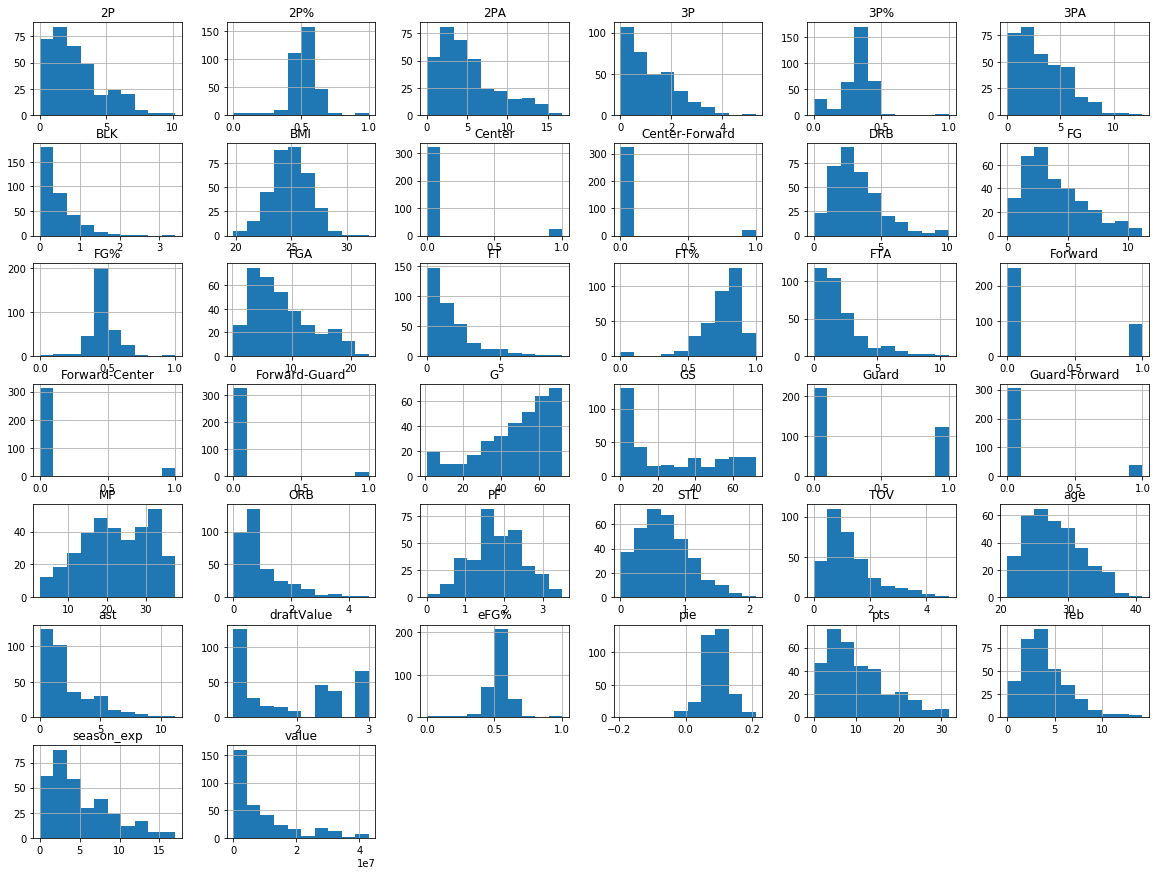

In [364]:
final_data.hist(figsize=(20,15))
raw_data.info()

In [370]:
# Feature engineering 

final_data

,age,value,pts,ast,reb,pie,season_exp,draftValue,BMI,Center,...,eFG%,FT,FTA,FT%,ORB,DRB,STL,BLK,TOV,PF
Display_first_last,,,,,,,,,,,,,,,,,,,,,
Bogdan Bogdanovic,29,18000000.0,9.6,2.3,3.3,0.080,3,1.27,25.420776,0.0,...,0.602,0.9,1.0,0.909,0.5,3.2,1.1,0.3,1.2,2.3
Brandon Goodwin,26,1701593.0,3.9,1.6,1.0,0.062,2,3.00,24.409722,0.0,...,0.448,0.6,0.9,0.651,0.2,1.3,0.4,0.0,0.8,0.9
Bruno Fernando,23,1517981.0,1.5,0.4,3.0,0.073,1,2.34,25.715592,0.0,...,0.409,0.5,0.7,0.682,0.5,1.9,0.1,0.1,0.6,0.7
Cam Reddish,22,4458000.0,11.2,1.3,4.0,0.053,1,1.10,23.945938,0.0,...,0.428,2.6,3.2,0.817,0.8,3.2,1.3,0.3,1.3,2.6
Clint Capela,27,16000000.0,14.3,0.9,14.2,0.161,6,1.25,25.092207,1.0,...,0.594,2.1,3.6,0.573,4.7,9.6,0.7,2.0,1.2,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Raul Neto,29,1620564.0,7.7,2.2,2.2,0.081,5,2.47,23.745543,0.0,...,0.539,1.2,1.3,0.882,0.4,2.0,1.1,0.1,0.8,1.7
Robin Lopez,33,7300000.0,8.2,0.9,4.1,0.084,12,1.15,27.996457,1.0,...,0.639,1.4,1.9,0.723,2.0,1.8,0.2,0.6,1.1,1.5
Rui Hachimura,23,4692840.0,13.4,1.5,5.8,0.085,1,1.90,25.264063,0.0,...,0.513,2.2,2.8,0.770,0.9,4.6,0.8,0.1,1.2,2.1


In [372]:

target_values = final_data['value']
training_values = final_data.drop(columns = 'value')

,age,pts,ast,reb,pie,season_exp,draftValue,BMI,Center,Center-Forward,...,eFG%,FT,FTA,FT%,ORB,DRB,STL,BLK,TOV,PF
Display_first_last,,,,,,,,,,,,,,,,,,,,,
Bogdan Bogdanovic,29,9.6,2.3,3.3,0.080,3,1.27,25.420776,0.0,0.0,...,0.602,0.9,1.0,0.909,0.5,3.2,1.1,0.3,1.2,2.3
Brandon Goodwin,26,3.9,1.6,1.0,0.062,2,3.00,24.409722,0.0,0.0,...,0.448,0.6,0.9,0.651,0.2,1.3,0.4,0.0,0.8,0.9
Bruno Fernando,23,1.5,0.4,3.0,0.073,1,2.34,25.715592,0.0,0.0,...,0.409,0.5,0.7,0.682,0.5,1.9,0.1,0.1,0.6,0.7
Cam Reddish,22,11.2,1.3,4.0,0.053,1,1.10,23.945938,0.0,0.0,...,0.428,2.6,3.2,0.817,0.8,3.2,1.3,0.3,1.3,2.6
Clint Capela,27,14.3,0.9,14.2,0.161,6,1.25,25.092207,1.0,0.0,...,0.594,2.1,3.6,0.573,4.7,9.6,0.7,2.0,1.2,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Raul Neto,29,7.7,2.2,2.2,0.081,5,2.47,23.745543,0.0,0.0,...,0.539,1.2,1.3,0.882,0.4,2.0,1.1,0.1,0.8,1.7
Robin Lopez,33,8.2,0.9,4.1,0.084,12,1.15,27.996457,1.0,0.0,...,0.639,1.4,1.9,0.723,2.0,1.8,0.2,0.6,1.1,1.5
Rui Hachimura,23,13.4,1.5,5.8,0.085,1,1.90,25.264063,0.0,0.0,...,0.513,2.2,2.8,0.770,0.9,4.6,0.8,0.1,1.2,2.1


Text(0.5, 1.0, 'Salary v PIE')

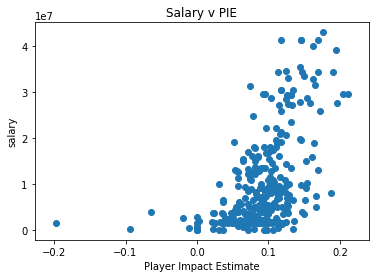

In [374]:
# Graph some values against some info
plt.scatter(training_values['pie'],target_values)
plt.ylabel('salary')
plt.xlabel('Player Impact Estimate')
plt.title('Salary v PIE')

Text(0.5, 1.0, 'Salary v season_exp')

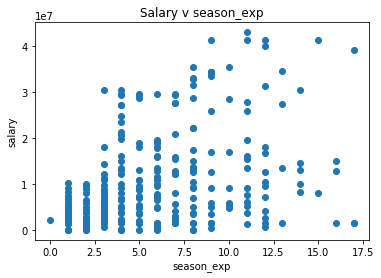

In [320]:
plt.scatter(training_values['season_exp'],target_values)
plt.ylabel('salary')
plt.xlabel('season_exp')
plt.title('Salary v season_exp')

Text(0.5, 1.0, 'Salary v Age')

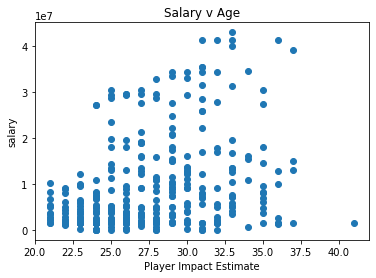

In [321]:
plt.scatter(training_values['age'],target_values)
plt.ylabel('salary')
plt.xlabel('Player Impact Estimate')
plt.title('Salary v Age')

Text(0.5, 1.0, 'Salary v pts+ast+reb')

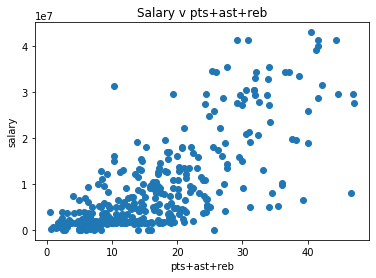

In [322]:
plt.scatter(training_values['pts']+training_values['ast']+training_values['reb'],target_values)
plt.ylabel('salary')
plt.xlabel('pts+ast+reb')
plt.title('Salary v pts+ast+reb')

Text(0.5, 1.0, 'Salary v pts+ast+reb')

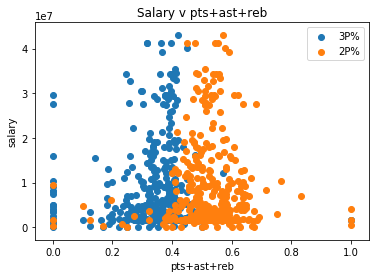

In [387]:
plt.scatter(training_values['3P%'],target_values, label = '3P%')
plt.scatter(training_values['2P%'],target_values, label = '2P%')
plt.ylabel('salary')
plt.xlabel('pts+ast+reb')
plt.legend()
plt.title('Salary v pts+ast+reb')

Text(0.5, 1.0, 'Salary v pts+ast+reb')

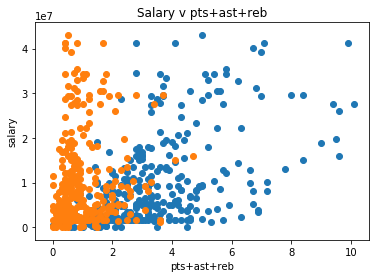

In [383]:
plt.scatter(training_values['DRB'],target_values)
plt.scatter(training_values['ORB'],target_values)
plt.ylabel('salary')
plt.xlabel('pts+ast+reb')
plt.title('Salary v pts+ast+reb')

In [323]:
training_values

,age,pts,ast,reb,pie,season_exp,draftValue,BMI,Center,Center-Forward,Forward,Forward-Center,Forward-Guard,Guard,Guard-Forward
0,29,9.6,2.3,3.3,0.080,3,1.27,25.420776,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,26,3.9,1.6,1.0,0.062,2,3.00,24.409722,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23,1.5,0.4,3.0,0.073,1,2.34,25.715592,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,22,11.2,1.3,4.0,0.053,1,1.10,23.945938,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,27,14.3,0.9,14.2,0.161,6,1.25,25.092207,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,29,7.7,2.2,2.2,0.081,5,2.47,23.745543,0.0,0.0,0.0,0.0,0.0,1.0,0.0
395,33,8.2,0.9,4.1,0.084,12,1.15,27.996457,1.0,0.0,0.0,0.0,0.0,0.0,0.0
396,23,13.4,1.5,5.8,0.085,1,1.90,25.264063,0.0,0.0,1.0,0.0,0.0,0.0,0.0
397,33,21.7,10.3,9.5,0.146,12,1.40,24.995556,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [388]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(training_values, target_values, test_size = 0.2, random_state =42)

In [389]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.transform(X_test)

In [390]:
pd.DataFrame(scale_X_train)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.453099,2.554610,1.864912,0.426337,1.934454,1.612621,-0.233887,-0.990617,-0.288104,-0.257192,...,0.805459,2.652353,2.238284,1.048379,-0.557589,0.862617,1.332387,-0.848024,2.442336,0.121202
1,-0.884371,1.069432,-0.515382,1.389849,0.731131,-0.582947,-0.946253,0.198112,-0.288104,-0.257192,...,0.858493,0.669060,0.558038,0.526621,1.168732,1.120705,-0.569040,1.128562,0.017280,1.884528
2,-0.624652,0.361543,-0.661114,0.888822,0.036907,-0.034055,-1.057997,0.389695,-0.288104,3.888142,...,0.296332,0.470731,0.449635,0.206023,0.428880,0.965852,0.517490,6.399458,0.132759,2.472304
3,0.154504,2.943255,1.087673,0.349256,1.425356,0.789283,-0.792606,0.596797,-0.288104,-0.257192,...,0.031162,3.379561,2.997104,0.878650,0.305571,0.088353,1.332387,-0.189162,2.095899,0.708977
4,-0.364934,-0.776631,-0.855424,-0.151771,0.175752,-0.034055,-1.044029,0.136251,-0.288104,-0.257192,...,0.285726,-0.653136,-0.634395,-0.611187,-0.680898,-0.014882,-1.112305,-1.067645,-1.137509,-1.789068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,-1.144090,-1.331838,-0.952578,-1.269445,-1.652372,-0.857394,0.743871,-0.234918,-0.288104,-0.257192,...,-0.965877,-1.049794,-1.068007,0.004864,-0.927515,-1.253705,-0.840673,-0.628404,-0.791072,-1.495181
270,-1.144090,0.319903,-0.369649,2.199199,1.263370,-0.582947,-0.904350,-0.022717,3.470968,-0.257192,...,1.006988,0.999609,1.316859,-0.290589,2.648435,1.843352,-0.569040,2.007044,0.363716,-0.466574
271,-1.663528,-1.234677,-1.146888,-1.616309,-6.697069,-1.131840,0.729903,-1.361534,-0.288104,-0.257192,...,-0.509785,-1.049794,-0.959604,-2.616496,-0.680898,-1.356941,-1.383938,-0.408783,-1.137509,-1.642125
272,-1.403809,-0.360226,-0.466804,-0.729878,-0.356487,-0.857394,-0.876414,-1.279238,-0.288104,-0.257192,...,0.423614,-0.653136,-0.688596,0.363179,-0.927515,-0.685912,-1.112305,-0.848024,-0.675593,-0.466574


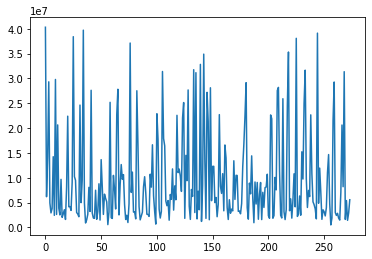

In [466]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict

rnd_reg = RandomForestRegressor(n_estimators=1000, n_jobs=-1)

rnd_reg.fit(scale_X_train, y_train)

y_train_pred = cross_val_predict(rnd_reg, scale_X_train, y_train, cv=3)

plt.plot(rnd_reg.predict(scale_X_train))

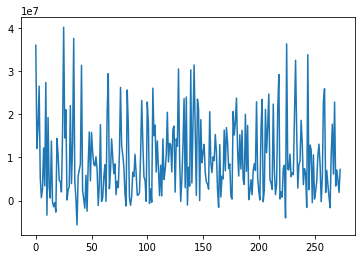

In [452]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()

ln_reg.fit(scale_X_train,y_train)

y_train_pred2 = cross_val_predict(ln_reg, scale_X_train, y_train, cv=3)

plt.plot(ln_reg.predict(scale_X_train))


In [462]:
pd.DataFrame(y_train_pred)

,0
0,31845958.5
1,12823543.7
2,10240744.7
3,29065658.6
4,5221792.2
...,...
269,1438658.5
270,4523520.7
271,1950296.6
272,4372937.0


In [454]:
y_train

Display_first_last
Stephen Curry      43006362.0
John Collins        4137302.0
Myles Turner       18000000.0
Bradley Beal       28751774.0
Trey Lyles          5500000.0
                      ...    
Rodions Kurucs      1780152.0
Jarrett Allen       3909902.0
Alen Smailagic      1517981.0
Anfernee Simons     2252040.0
Josh Jackson        4767000.0
Name: value, Length: 274, dtype: float64

In [467]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rnd_reg, scale_X_train, y_train,
    scoring="neg_mean_squared_error", cv=3)
tree_rmse_scores = np.sqrt(-scores)

In [468]:
tree_rmse_scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [4484953.96100311 5013945.44390162 4837283.33262456]
Mean: 4778727.579176431
Standard deviation: 219893.2762973919


In [471]:
y_train

Display_first_last
Stephen Curry      43006362.0
John Collins        4137302.0
Myles Turner       18000000.0
Bradley Beal       28751774.0
Trey Lyles          5500000.0
                      ...    
Rodions Kurucs      1780152.0
Jarrett Allen       3909902.0
Alen Smailagic      1517981.0
Anfernee Simons     2252040.0
Josh Jackson        4767000.0
Name: value, Length: 274, dtype: float64

In [415]:
X_train.columns

Index(['age', 'pts', 'ast', 'reb', 'pie', 'season_exp', 'draftValue', 'BMI',
       'Center', 'Center-Forward', 'Forward', 'Forward-Center',
       'Forward-Guard', 'Guard', 'Guard-Forward', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'STL', 'BLK', 'TOV', 'PF'],
      dtype='object')

In [443]:
ft_imp = rnd_reg.feature_importances_

data = {'first_column': X_train.columns.tolist(),
        'second_column': ft_imp}

pd.DataFrame(data)

,first_column,second_column
0,age,0.046184
1,pts,0.305617
2,ast,0.043215
3,reb,0.005216
4,pie,0.011041
5,season_exp,0.150618
6,draftValue,0.012001
7,BMI,0.008271
8,Center,0.000375
9,Center-Forward,0.000578
